In [1]:
from numpy import sin, cos, pi, exp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from IPython.display import Audio

# Configure default pyplot settings
plt.rcParams["figure.figsize"] = [8.00, 4.5]
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.xmargin"] = 0.0

# Enable importing from modules in top-level directory
from sys import path
if path[0] != '..': path.insert(0, '..')

<img src="figures/NTNU_logo_vertical.svg" align="left" style="width: 30%">
<br clear="all" />
<br></br>

# The Nyquist Sampling Theorem

* **Course AIS2201 - Signal Processing**
* **Uke 36, 2025**
* **Lecturer: Kai Erik Hoff**



# Ideal sampling

* Samples of the analog signal $x(t)$ are taken without error at the precise moment $t=n\cdot T_s$.

<img src="figures/ideal_sampling.svg" style="width: 60%; margin-left: 100px">
     


# [Youtube-Video](https://youtu.be/yr3ngmRuGUc)

* The video illustrates another challenge presented by discretizing a continuous-time signal: ***Aliasing***!
<!--
* Videoen illustrerer en annen utfordring med digitalisering av analoge signal: ***Aliasing***!
* For å få en bedre idé av hva som skjer her, er det nyttig å se på hva som skjer når vi sampler en enkel type signal: en sinusbølge.-->

# The 'problem' with discrete-time signals

* We can only estimate what the signal value is between sampling intervals

<img src="figures/Fig6_SamplingChallenge.png" style="width: 60%; margin-left: 100px">

## Sampling scenario part 1:

<img src="figures/ECG_signal_plot.svg" style="width: 60%; margin-left:100px">


## Sampling scenario part 2:

<img src="figures/ECG_signal_sampled.svg" style="width: 60%; margin-left:100px">


## Sampling scenario part 3:

<img src="figures/ECG_signal_reconstructed.svg" style="width: 60%; margin-left:100px">



## How can we guarantee successful reconstruction from a sampled signal?




* Using sinusoids as a basis, a criteria for successful sampling can be formulated:
    1. Any signal can be decomposed into component sinusoids
    2. If any sinusoids present in the signal can be reconstructed individually, the full signal can also be reconstructed
<!--
* Med utgangspunkt i sinusbølger kan man formulere et kriterkie for vellykket rekonstruksjon:

    1. Alle signal kan dekomponeres til en sum av sinusbølger.
    2. Dersom vi kan rekonstruere alle sinusbølgene individuelt, bør rekonstruksjon av et mer komplisert signal være mulig.
* Hvilke begrensninger har vi for sampling av sinussignal?
-->

* What are the limitations for sampling a sinusoid?

## Interactive demo: sampling a sinusoid

Output()

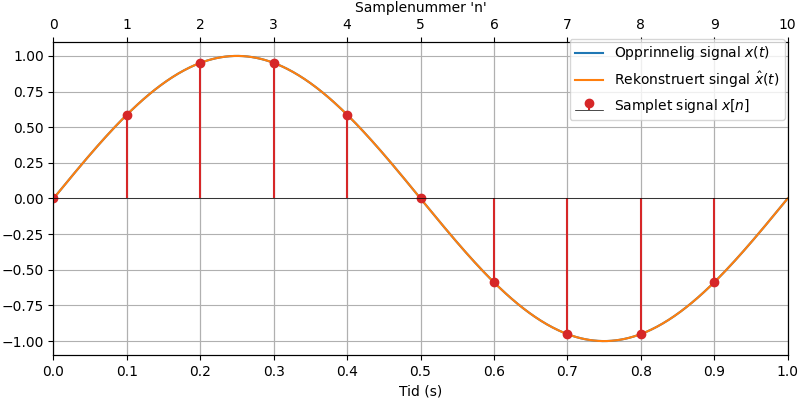

In [2]:
from demos import AliasingDemo
%matplotlib ipympl
AliasingDemo(fig_num=1);

# Aliasing




<!--
* Når en sinusformet bølge med frekvens $f$ samples med samplingsfrekvens $f_s \leq 2\cdot f$, vil samplene "se ut" som et annet signal.
* Dette falske signalet er kjent som en alias.
* En alias av et signalkomponent er ofte umulig å adskille fra de delene av signalet som er samplet korrekt.-->

* When sampling a sinusoid with frequency $f$ at a rate of $f_s \leq 2\cdot f$, the samples will 'appear' to belong to a different signal.

* The false signal is known as an *alias*

* An alias of a signal component is practically impossible to distinguish from accurately sampled signal components.

# Nyquist Sampling Theorem
* An analog singal $x(t)$ which does not contain frequency components with a frequency higher than $f_{\text{max}}$ can be reconstructed flawlessly from the sampled signal $x[n] = x(n \cdot T_s)$ *only* if the sampling frequency $f_s = \frac{1}{T_s}$ is greater than $2 \cdot f_{max}$
<!--* Et analogt signal $x(t)$ som ikke inneholder frekvenskomponenter høyere enn $f_{max}$ kan rekonstrueres uten feil fra det samplede signalet $x[n] = x(n\cdot T_s)$ *kun* hvis samplingsfrekvensen $f_s =\frac{1}{T_s}$ er større enn $2\cdot f_{max}$.-->

## $$f_s > 2\cdot f_{max} = \text{Nyquist rate}$$
* The maximum frequency contained in the signal, $\frac{f_s}{2}$ is referred to as the *Nyquist Freqyency*
<!--* Maksfrekvensen $\frac{f_s}{2}$ er kjent som *Nyquist Frekvensen*-->

## Example 1:

* Audio is commonly recorded using a sampling frequency $f_s = 44\ 100\ \text{Hz}$.
    - What is the Nyquist Frequency for such an audio recording?
    - Can you think of a reason for the sampling frequency to have ths value?

# The sampling theorem and normalized frequency

* The Nyquist Rate corresponds to:
$$\begin{align}
\hat{f}_{\text{Nyquist}} &= \frac{f_s}{2}\cdot \frac{1}{f_s} = \frac{1}{2} \\
\hat{\omega}_{\text{Nyquist}} &= 2\pi \cdot \frac{f_s}{2}\cdot \frac{1}{f_s} = \pi
\end{align}$$
<!--* Aliasing ved sampling av sinusbølge forekommer når $f \geq \frac{f_s}{2}$. 
    * Denne "maksfrekvensen" tilsvarer normalisert vinkelfrekvens $\hat{\omega} = 2\pi \frac{f}{f_s}|_{f=\frac{f_s}{2}}= \pi$-->
<!--* Når man betrakter sinusbølger som en sum av komplekse eksponentialer definerer dette et begrenset frekvensområde i det tosidige frekvensspekteret der aliasing ikke vil forekomme.

$$-\pi < \hat{\omega} < \pi$$-->

* The two-sided spectrum of a discrete-time signal will *always* be confined within the normalized frequency range:
$$ \begin{align}
-\frac{1}{2} < &\hat{f} < \frac{1}{2} \\
&\text{or} \\
-\pi < &\hat{\omega} < \pi
\end{align}$$

# Mathematical explanation for aliasing

* The ambiguity of discrete-time sinusoids:

$$ \cos\left( \hat{\omega} \cdot n + \phi \right) = \cos\left( (\hat{\omega} + k\cdot 2\pi)\cdot n + \phi \right), \ \ \ k \in \mathbb{Z} $$


<!--
* The 

* The discrete-time sinusoid $ \cos\left( \hat{\omega} \cdot n + \phi \right) $ is indistinguishable from any of the functions $ \cos\left( (\hat{\omega} + k\cdot 2\pi)\cdot n + \phi \right), \ \ \  $



* All normalized angular frequencies outside the interval $\hat{\omega} \in [\pi, \pi]$ will 

* Alle normaliserte vinkelfrekvenser utenfor intervallet $-\pi < \hat{\omega} < \pi$ vil ha en alias *i* frekvensintervallet $-\pi < \hat{\omega} < \pi$.<br><br>
$$ \hat{\omega} = k\cdot 2\pi + \hat{\omega}_{alias}$$
    - der $k$ er et heltall, og $\hat{\omega}_{alias}$ er alias-frekvensen i rad/sample.


* Eksempel:
    - En vinkelfrekvens $\hat{\omega}=\frac{7\pi}{5}$ for et diskrét komplekst eksponential $x[n] = e^{j\hat{\omega}\cdot n}$ påfører altså $\frac{7\pi}{5}$ radianer rotasjon mellom hvar sample. 
    - En annen vinkelfrekvens $\hat{\omega}=-\frac{3\pi}{5}$ vil gi ***nøyaktig*** de samme sampleverdiene.-->

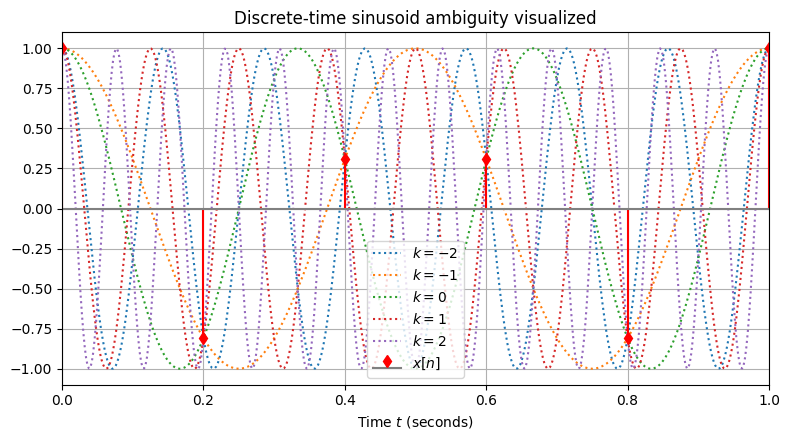

In [39]:
f = 3 # Original signal frequency
t = np.linspace(0, 1, 501)

fs = 5 # Sampling frequency
n = np.arange(fs+1)
k_values = np.arange(-2, 3) # Range of spectral copies to show

for k in k_values:
    x_k = np.cos(2*pi*(f+k*fs)*t)
    plt.plot(t, x_k,':', label=f"${k = :d}$")
plt.stem(n/fs, cos(2*pi*f/fs*n), basefmt='gray', markerfmt="rd", linefmt="r", label="$x[n]$")
plt.legend(loc="lower center")
plt.xlabel("Time $t$ (seconds)")
plt.title("Discrete-time sinusoid ambiguity visualized");

* Any one of the sinusoids shown has the potential of being the "true" signal

## Example 2: 
* Find an expression for the reconstructed signal $\hat{x}(t)$ when a sinusoid $x(t) = \cos\left(2\pi \cdot 475 \cdot t + \frac{\pi}{3} \right)$ is sampled at sampling frequency $f_s = 300Hz$?

Text(0.5, 1.0, 'Plot for regneeksempel 2')

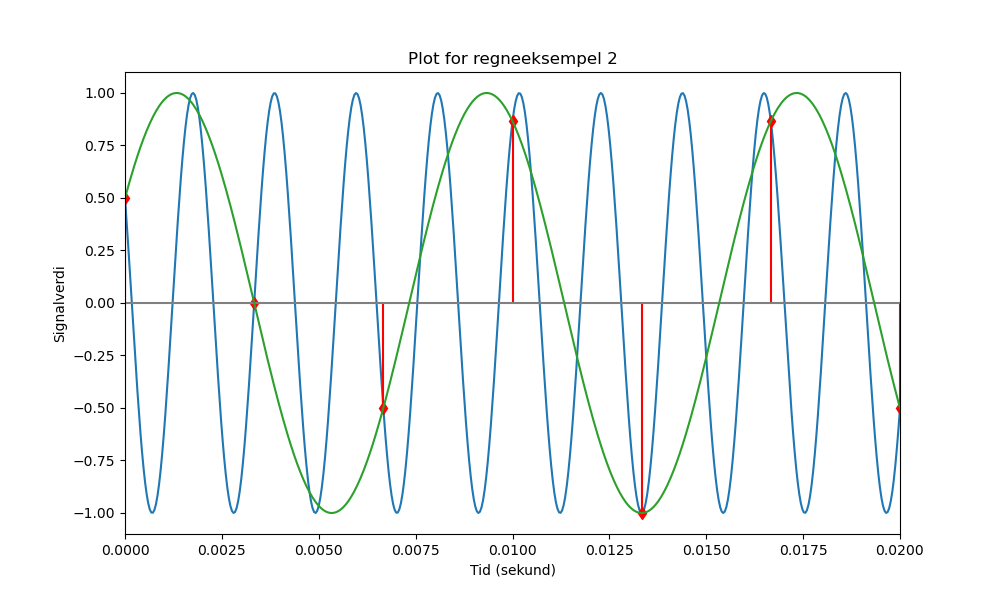

In [4]:
# Python-kode for regneeksempel 2
fs = 300 # Hz

# Signal parameters x(t) = A*cos(2*pi*f*t+phi)
f = 475 # Hz
phi = pi/3 # Radianer
A = 1 # Volt 

# Simulate analog signal x(t)
time_window = 0.02 # seconds
t = np.linspace(0, time_window, 501)
x_t = A*cos(2*pi*f*t + phi) 

# Generate signal samples x[n]
n = np.arange(0, int(time_window*fs)+1)
x_n = A*cos(2*pi*f/fs*n + phi)

# Alias
x_a = A*cos(2*pi*(f-2*fs)*t + phi) 

plt.close(3); plt.figure(3, figsize=(10, 6))
plt.plot(t, x_t, "tab:blue", label=r"$x(t)$")
plt.stem(n/fs, x_n, basefmt='gray', markerfmt="rd", linefmt="r", label=r"$x[n]$")
plt.plot(t, x_a, "tab:green", label=r"$\hat{x}(t)$")
plt.xlim([t[0], t[-1]])
plt.xlabel("Tid (sekund)")
plt.ylabel("Signalverdi")
plt.title("Plot for regneeksempel 2")

## Code Illustration: aliasing in a chirp-signal

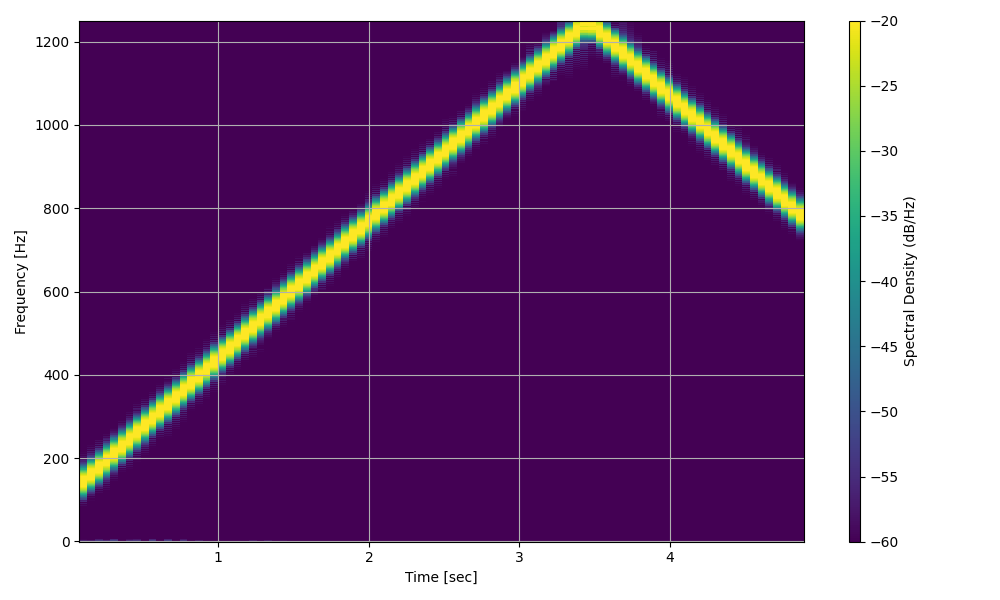

In [5]:
fs = 2500 # Samplet per second
T = 5 # Signalvarighet i seconds
t = np.linspace(0, T, int(T*fs), endpoint=False) # array of sample time values
x_t = sig.chirp(t, f0 = 110, t1=T, f1 = 1760)    # Lag en tone som gradvis øker i frekvens

# Her genereres og vises et spektrogram basert på det genererte chirp-signalet.
# Vi skal snakke om alle du forskjellige parametrene om et par uker, så ikke
# bli forskrekket om det ser helt gresk ut.
plt.close(4); plt.figure(4, figsize=(10,6))

f_axis, t_axis, Sxx = sig.spectrogram(x_t, fs,'hamming', 512, 384, 2048)
plt.pcolormesh(t_axis, f_axis, 10*np.log10(Sxx), vmax =-20, vmin = -60, shading='auto')
plt.colorbar(aspect=50, label=r'Spectral Density (dB/Hz)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.tight_layout();plt.show()

Audio(x_t/max(abs(x_t))/16, rate=fs, normalize=False) # Spill av "x_t" til en Audio widget

# Folding diagram
<img src="figures/Fig14_FreqFolding1.png" style="width: 60%; margin-left:100px">

# Questions?